# [How to train an object detection model easy for free](https://www.dlology.com/blog/how-to-train-an-object-detection-model-easy-for-free/) | DLology Blog

## Configs and Hyperparameters

Support a variety of models, you can find more pretrained model from [Tensorflow detection model zoo: COCO-trained models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md#coco-trained-models), as well as their pipline config files in [object_detection/samples/configs/](https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs).

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# If you forked the repository, you can replace the link.
repo_url = 'https://github.com/Tony607/object_detection_demo'

# Number of training steps.
num_steps = 100000 #1000  # 200000

# Number of evaluation steps.
num_eval_steps = 50

MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
        # 'batch_size': 8
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    }
}

# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'faster_rcnn_inception_v2'

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Training batch size fits in Colabe's Tesla K80 GPU memory for selected model.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

## Clone the `object_detection_demo` repository or your fork.

In [ ]:
# !ls

gdrive	sample_data


In [ ]:
import os
%cd '/content/gdrive/My Drive/custom object detection/XXX'
# repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

/content/gdrive/My Drive/custom object detection/XXX


In [ ]:
# # import os

# %cd '/content/gdrive/My Drive/custom object detection/XXX'

# repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

# !git clone {repo_url}
# %cd {repo_dir_path}
# !git pull

## Install required packages

In [ ]:
!python -m pip install --upgrade pip

     |████████████████████████████████| 1.5MB 3.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
# !ls

object_detection_demo


In [ ]:
# !git clone --quiet https://github.com/tensorflow/models.git

In [ ]:
%cd '/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo'

/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo


In [ ]:
# # Install the Object Detection API
# %%bash
# cd models/research/
# protoc object_detection/protos/*.proto --python_out=.
# cp object_detection/packages/tf2/setup.py .
# python -m pip install .

Process is terminated.


In [ ]:
# %cd models/research/

In [ ]:
# %cd /content
# !git clone --quiet https://github.com/tensorflow/models.git

# !apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

# !pip install -q Cython contextlib2 pillow lxml matplotlib

# !pip install -q pycocotools




# %cd /content/models/research
# !protoc object_detection/protos/*.proto --python_out=.

# import os
# os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

# !python object_detection/builders/model_builder_test.py

/content
fatal: destination path 'models' already exists and is not an empty directory.
/content/models/research
2020-10-16 09:30:51.517052: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


## Prepare `tfrecord` files

Use the following scripts to generate the `tfrecord` files.
```bash
# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt
```

In [ ]:

# import tensorflow.compat.flags as tf.app.flags

In [ ]:
# import tensorflow as tf

In [ ]:
# repo_dir_path

'/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo'

In [ ]:
%cd "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo"

# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
!python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
!python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
# !python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
# !python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt

/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo
Successfully converted xml to csv.
Generate `data/annotations/label_map.pbtxt`
Successfully converted xml to csv.


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf
import sys

sys.path.append("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research")

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

In [ ]:
def split(df, group):
    data = namedtuple("data", ["filename", "object"])
    gb = df.groupby(group)
    return [
        data(filename, gb.get_group(x))
        for filename, x in zip(gb.groups.keys(), gb.groups)
    ]


def create_tf_example(group, path, label_map):
    with tf.io.gfile.GFile(os.path.join(path, "{}".format(group.filename)), "rb") as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode("utf8")
    image_format = b"jpg"
    # check if the image format is matching with your images.
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row["xmin"] / width)
        xmaxs.append(row["xmax"] / width)
        ymins.append(row["ymin"] / height)
        ymaxs.append(row["ymax"] / height)
        classes_text.append(row["class"].encode("utf8"))
        class_index = label_map.get(row["class"])
        assert (
            class_index is not None
        ), "class label: `{}` not found in label_map: {}".format(
            row["class"], label_map
        )
        classes.append(class_index)

    tf_example = tf.train.Example(
        features=tf.train.Features(
            feature={
                "image/height": dataset_util.int64_feature(height),
                "image/width": dataset_util.int64_feature(width),
                "image/filename": dataset_util.bytes_feature(filename),
                "image/source_id": dataset_util.bytes_feature(filename),
                "image/encoded": dataset_util.bytes_feature(encoded_jpg),
                "image/format": dataset_util.bytes_feature(image_format),
                "image/object/bbox/xmin": dataset_util.float_list_feature(xmins),
                "image/object/bbox/xmax": dataset_util.float_list_feature(xmaxs),
                "image/object/bbox/ymin": dataset_util.float_list_feature(ymins),
                "image/object/bbox/ymax": dataset_util.float_list_feature(ymaxs),
                "image/object/class/text": dataset_util.bytes_list_feature(
                    classes_text
                ),
                "image/object/class/label": dataset_util.int64_list_feature(classes),
            }
        )
    )
    return tf_example


def main(csv_input, output_path, img_path, label_map):
    writer = tf.io.TFRecordWriter(output_path)
    path = os.path.join(os.getcwd(), img_path)
    examples = pd.read_csv(csv_input)

    # Load the `label_map` from pbtxt file.
    from object_detection.utils import label_map_util

    label_map = label_map_util.load_labelmap(label_map)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True
    )
    category_index = label_map_util.create_category_index(categories)
    label_map = {}
    for k, v in category_index.items():
        label_map[v.get("name")] = v.get("id")

    grouped = split(examples, "filename")
    for group in grouped:
        tf_example = create_tf_example(group, path, label_map)
        writer.write(tf_example.SerializeToString())

    writer.close()
    output_path = os.path.join(os.getcwd(), output_path)
    print("Successfully created the TFRecords: {}".format(output_path))


In [ ]:
main("data/annotations/train_labels.csv", "data/annotations/train.record", "data/images/train", "data/annotations/label_map.pbtxt")

Successfully created the TFRecords: /content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations/train.record


In [ ]:
main("data/annotations/test_labels.csv", "data/annotations/test.record", "data/images/test", "data/annotations/label_map.pbtxt")

Successfully created the TFRecords: /content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations/test.record


In [ ]:
%cd "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations/"

/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations


In [ ]:
# !ls

label_map.pbtxt  test_labels.csv  test.record  train_labels.csv  train.record


In [ ]:
test_record_fname = '/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations/test.record'
train_record_fname = '/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations/train.record'
label_map_pbtxt_fname = '/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations/label_map.pbtxt'

## Download base model

In [ ]:
# %cd "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research"

# import os
# import shutil
# import glob
# import urllib.request
# import tarfile
# MODEL_FILE = MODEL + '.tar.gz'
# DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
# DEST_DIR = "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/pretrained_model"

# if not (os.path.exists(MODEL_FILE)):
#     urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

# tar = tarfile.open(MODEL_FILE)
# tar.extractall()
# tar.close()

# os.remove(MODEL_FILE)
# if (os.path.exists("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/pretrained_model")):
#     shutil.rmtree("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/pretrained_model")
#     # print('xxx')
# os.rename(MODEL, "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/pretrained_model")

/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research


In [ ]:
!echo "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/pretrained_model"
!ls -alh "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/pretrained_model"

/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/pretrained_model
total 111M
-rw------- 1 root root   77 Feb  1  2018 checkpoint
-rw------- 1 root root  55M Feb  1  2018 frozen_inference_graph.pb
-rw------- 1 root root  51M Feb  1  2018 model.ckpt.data-00000-of-00001
-rw------- 1 root root  16K Feb  1  2018 model.ckpt.index
-rw------- 1 root root 5.5M Feb  1  2018 model.ckpt.meta
-rw------- 1 root root 3.2K Feb  1  2018 pipeline.config
drwx------ 2 root root 4.0K Feb  1  2018 saved_model


In [ ]:
fine_tune_checkpoint = "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/pretrained_model/model.ckpt"
fine_tune_checkpoint

'/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/pretrained_model/model.ckpt'

## Configuring a Training Pipeline

In [ ]:
import os
# pipeline_fname = os.path.join('/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/samples/configs/', pipeline_file)
pipeline_fname = "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config"


assert os.path.isfile("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config"), '`{}` not exist'.format("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config")

In [ ]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [ ]:
import re

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    f.write(s)

In [ ]:
!cat "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config"

# Faster R-CNN with Inception v2, configured for Oxford-IIIT Pets Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  faster_rcnn {
    num_classes: 3
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: 'faster_rcnn_inception_v2'
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        tru

In [ ]:
model_dir = 'training/'
# Optionally remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

## Run Tensorboard(Optional)

In [ ]:
# !ls

In [ ]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip -o ngrok-stable-linux-amd64.zip

In [ ]:
# LOG_DIR = model_dir
# get_ipython().system_raw(
#     'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
#     .format(LOG_DIR)
# )

In [ ]:
# get_ipython().system_raw('./ngrok http 6006 &')

### Get Tensorboard link

In [ ]:
# ! curl -s http://localhost:4040/api/tunnels | python3 -c \
#     "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://7d39f5eb3bab.ngrok.io


## Train the model

In [ ]:
# !ls

label_map.pbtxt  test.record  train_labels.csv
test_labels.csv  training     train.record


In [ ]:
import os
os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/:/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/slim/'

In [ ]:
# import sys
sys.path.append('/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/') # Add PATH
sys.path.append('/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/slim/') # Add PATH

In [ ]:
!pip install tf_slim --use-feature=2020-resolver

     |████████████████████████████████| 352 kB 3.4 MB/s 
ERROR: object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires tf-models-official, which is not installed.


In [ ]:
# !python setup.py install

In [ ]:
# %cd slim

In [ ]:
# !python setup.py install

In [ ]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib

!pip install -q pycocotools

%cd '/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research'
!protoc object_detection/protos/*.proto --python_out=.

Selecting previously unselected package python-bs4.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [ ]:
# !python "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/builders/model_builder.py"

In [ ]:
!pip install tensorflow-object-detection-api --use-feature=2020-resolver

     |████████████████████████████████| 577 kB 3.4 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 2.6 MB 16.5 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844513 sha256=a3bd63f89cbe60dfda49c9d6b7459fb0e0125c816f716487d60de50d5df3884d
  Stored in directory: /root/.cache/pip/wheels/1a/99/e7/ea0c585728781ffd2670ed324603ee4814c8a751830134be83
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7540 sha256=4afdced6db1af313e636c679d799289e931369b95add1b169e116765e2befd65
  Stored in directory: /root/.cache/pip/wheels/19/a7/b9/0740c7a3a7d1d348f04823339274b90de25fbcd217b2ee1fbe
Successfully built tensorflow-object-detection-api gast
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [ ]:
# from object_detection import model_lib

In [ ]:
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

# from absl import flags

# import tensorflow.compat.v1 as tf

# from object_detection import model_lib

In [ ]:
# def main():
#   # flags.mark_flag_as_required('model_dir')
#   # flags.mark_flag_as_required('pipeline_config_path')
#   config = tf.estimator.RunConfig(model_dir="training/")

#   train_and_eval_dict = model_lib.create_estimator_and_inputs(
#       run_config=config,
#       pipeline_config_path="/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config",
#       train_steps=num_steps,
#       # sample_1_of_n_eval_examples=FLAGS.sample_1_of_n_eval_examples,
#       # sample_1_of_n_eval_on_train_examples=(
#       #     FLAGS.sample_1_of_n_eval_on_train_examples))
#   estimator = train_and_eval_dict['estimator']
#   train_input_fn = train_and_eval_dict['train_input_fn']
#   eval_input_fns = train_and_eval_dict['eval_input_fns']
#   eval_on_train_input_fn = train_and_eval_dict['eval_on_train_input_fn']
#   predict_input_fn = train_and_eval_dict['predict_input_fn']
#   train_steps = train_and_eval_dict['train_steps']

#   name = 'training_data'
#   input_fn = eval_on_train_input_fn

  # if FLAGS.checkpoint_dir:
  #   if FLAGS.eval_training_data:
  #     name = 'training_data'
  #     input_fn = eval_on_train_input_fn
  #   else:
  #     name = 'validation_data'
  #     # The first eval input will be evaluated.
  #     input_fn = eval_input_fns[0]
  #   if FLAGS.run_once:
  #     estimator.evaluate(input_fn,
  #                        steps=None,
  #                        checkpoint_path=tf.train.latest_checkpoint(
  #                            FLAGS.checkpoint_dir))
  #   else:
  #     model_lib.continuous_eval(estimator, FLAGS.checkpoint_dir, input_fn,
  #                               train_steps, name, FLAGS.max_eval_retries)
  # else:
  #   train_spec, eval_specs = model_lib.create_train_and_eval_specs(
  #       train_input_fn,
  #       eval_input_fns,
  #       eval_on_train_input_fn,
  #       predict_input_fn,
  #       train_steps,
  #       eval_on_train_data=False)

  #   # Currently only a single Eval Spec is allowed.
  #   tf.estimator.train_and_evaluate(estimator, train_spec, eval_specs[0])


In [ ]:
# # learn on TPU
# # Distribution strategies
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)
# # Create and train a model
# strategy = tf.distribute.experimental.TPUStrategy(resolver)
# with strategy.scope():
#   # model = create_model()

#   !python  "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/model_main.py" \
#       --pipeline_config_path="/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config" \
#       --model_dir="training/" \
#       --alsologtostderr \
#       --num_train_steps={num_steps} \
#       --num_eval_steps={num_eval_steps}

In [ ]:
!python  "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/model_main.py" \
    --pipeline_config_path="/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config" \
    --model_dir="training/" \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

W1018 14:39:05.799658 139645941884800 model_lib.py:771] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 100000
I1018 14:39:05.799977 139645941884800 config_util.py:552] Maybe overwriting train_steps: 100000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1018 14:39:05.800109 139645941884800 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I1018 14:39:05.800208 139645941884800 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1018 14:39:05.800307 139645941884800 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1018 14:39:05.800443 139645941884800 model_lib.py:787] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_

In [ ]:
!ls {model_dir}

checkpoint
eval_0
events.out.tfevents.1602977240.066e7422e611
events.out.tfevents.1603021667.18a6324965a5
events.out.tfevents.1603022562.6b9f4fcfebd9
events.out.tfevents.1603024402.cacf3fabd2c4
events.out.tfevents.1603025099.cacf3fabd2c4
export
graph.pbtxt
model.ckpt-45906.data-00000-of-00001
model.ckpt-45906.index
model.ckpt-45906.meta
model.ckpt-46891.data-00000-of-00001
model.ckpt-46891.index
model.ckpt-46891.meta
model.ckpt-47877.data-00000-of-00001
model.ckpt-47877.index
model.ckpt-47877.meta
model.ckpt-48862.data-00000-of-00001
model.ckpt-48862.index
model.ckpt-48862.meta
model.ckpt-49845.data-00000-of-00001
model.ckpt-49845.index
model.ckpt-49845.meta


In [ ]:
# Legacy way of training(also works).
# !python "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/legacy/train.py" --logtostderr --train_dir={model_dir} --pipeline_config_path={pipeline_fname}

## Exporting a Trained Inference Graph
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

In [ ]:
!ls

a3c_blogpost	       ngrok
adversarial_text       ngrok-stable-linux-amd64.zip
attention_ocr	       ngrok-stable-linux-amd64.zip.1
audioset	       nst_blogpost
autoaugment	       object_detection
build		       object_detection.egg-info
cognitive_planning     pcl_rl
cvt_text	       pretrained_model
deeplab		       README.md
deep_speech	       rebar
delf		       sequence_projection
dist		       setup.py
efficient-hrl	       slim
fine_tuned_model       ssd_mobilenet_v2_coco_2018_03_29
lfads		       training
lstm_object_detection  vid2depth
marco


In [ ]:
import re
import numpy as np

output_directory = './fine_tuned_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/export_inference_graph.py" \
    --input_type=image_tensor \
    --pipeline_config_path="/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config" \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

training/model.ckpt-49845
Instructions for updating:
Please use `layer.__call__` method instead.
W1018 14:36:11.513050 140573151930240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Scale of 0 disables regularizer.
I1018 14:36:13.188752 140573151930240 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
I1018 14:36:13.388429 140573151930240 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1018 14:36:13.388979 140573151930240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1018 14:36:13.457994

In [ ]:
!ls {output_directory}

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


## Download the model `.pb` file

In [ ]:
!ls

a3c_blogpost	    dist			    object_detection.egg-info
adversarial_text    efficient-hrl		    pcl_rl
attention_ocr	    fine_tuned_model		    pretrained_model
audioset	    lfads			    README.md
autoaugment	    lstm_object_detection	    rebar
build		    marco			    sequence_projection
cognitive_planning  ngrok			    setup.py
cvt_text	    ngrok-stable-linux-amd64.zip    slim
deeplab		    ngrok-stable-linux-amd64.zip.1  training
deep_speech	    nst_blogpost		    vid2depth
delf		    object_detection


In [ ]:
import os

pb_fname = "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/fine_tuned_model/frozen_inference_graph.pb"
assert os.path.isfile("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/fine_tuned_model/frozen_inference_graph.pb"), '`{}` not exist'.format(pb_fname)

In [ ]:
!ls -alh "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/fine_tuned_model/frozen_inference_graph.pb"

-rw------- 1 root root 50M Oct 18 06:24 '/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/fine_tuned_model/frozen_inference_graph.pb'


### Option1 : upload the `.pb` file to your Google Drive
Then download it from your Google Drive to local file system.

During this step, you will be prompted to enter the token.

In [ ]:
# # Install the PyDrive wrapper & import libraries.
# # This only needs to be done once in a notebook.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials


# # Authenticate and create the PyDrive client.
# # This only needs to be done once in a notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# fname = os.path.basename("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/fine_tuned_model/frozen_inference_graph.pb")
# # Create & upload a text file.
# uploaded = drive.CreateFile({'title': fname})
# uploaded.SetContentFile("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/fine_tuned_model/frozen_inference_graph.pb")
# uploaded.Upload()
# print('Uploaded file with ID {}'.format(uploaded.get('id')))

### Option2 :  Download the `.pb` file directly to your local file system
This method may not be stable when downloading large files like the model `.pb` file. Try **option 1** instead if not working.

In [ ]:
from google.colab import files
files.download(pb_fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Download the `label_map.pbtxt` file

In [ ]:
from google.colab import files
files.download(label_map_pbtxt_fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Download the modified pipline file
If you plan to use OpenVINO toolkit to convert the `.pb` file to inference faster on Intel's hardware (CPU/GPU, Movidius, etc.)

In [ ]:
# files.download(pipeline_fname)

In [ ]:
# !tar cfz fine_tuned_model.tar.gz fine_tuned_model
# from google.colab import files
# files.download('fine_tuned_model.tar.gz')

## Run inference test
Test with images in repository `object_detection_demo/test` directory.

In [ ]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/fine_tuned_model/frozen_inference_graph.pb"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations/label_map.pbtxt"

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/test"

assert os.path.isfile("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/fine_tuned_model/frozen_inference_graph.pb")
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/test/0.jpg', '/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/test/10.jpg', '/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/test/15.jpg', '/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/test/Копия 14.jpg']


In [ ]:
%tensorflow_version 1.x

In [ ]:
!python -m pip install --upgrade pip
!pip install tf_slim --use-feature=2020-resolver

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)


In [ ]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [ ]:
num_classes = get_num_classes('/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations/label_map.pbtxt')

/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection


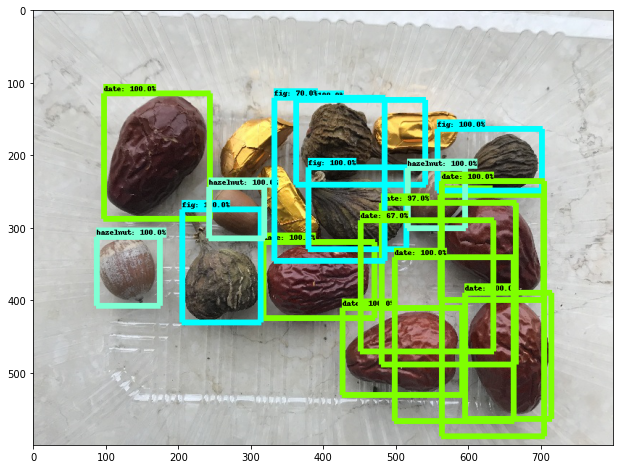

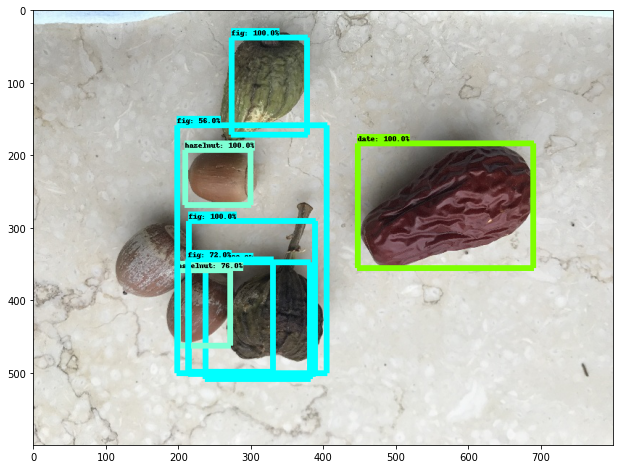

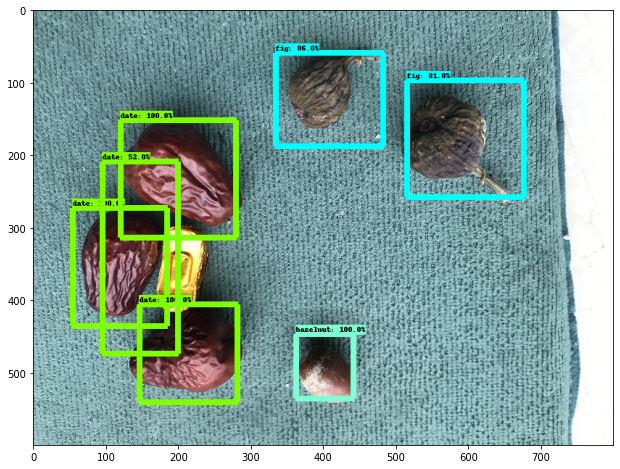

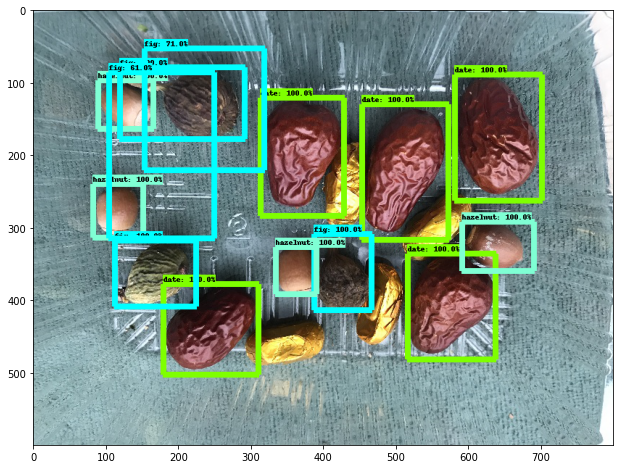

In [ ]:
%cd "/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/object_detection"

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/models/research/fine_tuned_model/frozen_inference_graph.pb", 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap("/content/gdrive/My Drive/custom object detection/XXX/object_detection_demo/data/annotations/label_map.pbtxt")
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)